In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Olá

Teste

In [4]:
inventory = pd.read_csv('desafio.csv', sep=',')
inventory.head()

,order_id,code,quantity,price,pis_cofins,icms,tax_substitution,category,liquid_cost,order_status,capture_date,process_date,process_status,source_channel
0,bcb59c839e78b2601374cbad9239ca7b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500
1,4e91ee6b95895771dc9ee524e910a902,e6762ba2ffbca07ab6cee7551caeaad5,1,1036.29,95.8568,176.1693,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,em rota de entrega,2016-06-11,2016-06-11,processado,b76eb9b8fc0f17098812da9117d3e500
2,88eb0ac86af1a521c0831298d22dea8b,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,0.0000,191.8416,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-12,2016-06-12,processado,b76eb9b8fc0f17098812da9117d3e500
3,dee418152a36314b4aee6ce9cf94fcbf,e6762ba2ffbca07ab6cee7551caeaad5,1,978.90,90.5483,176.2020,0.0000,4ece547755cba9e7fc14125bc895f31b,542.7065,cancelado,2016-06-13,0000-00-00,captado,b76eb9b8fc0f17098812da9117d3e500
4,1c175bc61b9b659bbf011b2e5e3dcec6,e6762ba2ffbca07ab6cee7551caeaad5,1,976.05,90.2846,0.0000,192.3325,4ece547755cba9e7fc14125bc895f31b,542.7065,entrega total,2016-06-13,2016-06-13,processado,b76eb9b8fc0f17098812da9117d3e500


In [5]:
inventory.shape

(179149, 14)

In [6]:
inventory.dtypes

order_id             object
code                 object
quantity              int64
price               float64
pis_cofins          float64
icms                float64
tax_substitution    float64
category             object
liquid_cost         float64
order_status         object
capture_date         object
process_date         object
process_status       object
source_channel       object
dtype: object

In [7]:
inventory['capture_date'] = pd.to_datetime(inventory['capture_date'])

In [8]:
inventory.dtypes

order_id                    object
code                        object
quantity                     int64
price                      float64
pis_cofins                 float64
icms                       float64
tax_substitution           float64
category                    object
liquid_cost                float64
order_status                object
capture_date        datetime64[ns]
process_date                object
process_status              object
source_channel              object
dtype: object

In [9]:
#time_series = pd.read_csv('desafio.csv', index_col=10, parse_dates=True)
#time_series.head()

In [81]:
time_series = inventory.groupby('capture_date').sum()
time_series.head()

,quantity,price,pis_cofins,icms,tax_substitution,liquid_cost
capture_date,,,,,,
2016-06-01,241,65256.84,5411.5549,7420.9539,4381.9576,34417.9901
2016-06-02,274,75015.49,6100.1734,7663.8320,5991.5966,39485.6783
2016-06-03,364,89428.76,6887.3414,8487.6894,7738.9364,50782.9449
2016-06-04,251,57175.48,4993.4262,4972.9749,5503.5441,32166.1116
2016-06-05,242,66707.14,5665.5379,5737.3290,6567.0296,38019.4587


In [12]:
time_series.describe()

,quantity,price,pis_cofins,icms,tax_substitution,liquid_cost
count,366.000000,3.660000e+02,366.000000,366.000000,366.000000,366.000000
mean,516.535519,1.148505e+05,9557.221921,12283.721777,8748.170298,66586.113198
std,454.498727,8.348212e+04,7227.160213,9416.986825,6546.964680,55445.396778
min,170.000000,3.905395e+04,2324.219600,3658.942700,2514.137500,21632.726800
25%,335.500000,7.642117e+04,6241.646200,7782.707325,6021.100450,43062.589725
50%,461.000000,1.022212e+05,8503.211100,10713.506950,7728.563250,57107.736950
75%,595.000000,1.303972e+05,10945.347600,14310.309625,9730.829300,74537.593475
max,5745.000000,1.143711e+06,95915.050000,130287.958300,84664.105000,767209.635300


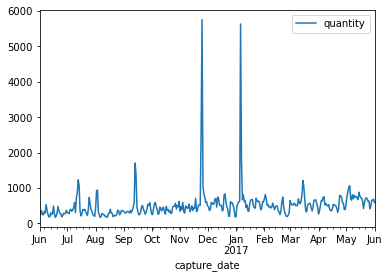

In [13]:
lines = time_series.reset_index().plot(x='capture_date', y="quantity")

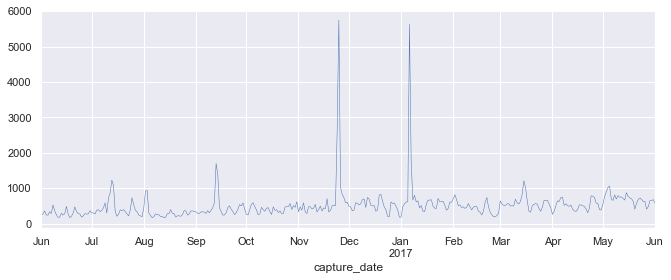

In [14]:
sns.set(rc={'figure.figsize':(11, 4)})
time_series['quantity'].plot(linewidth=0.5);

In [15]:
time_series['year'] = time_series.index.astype(str).str[:4]

In [16]:
time_series['month'] = time_series.index.astype(str).str[5:7]

In [76]:
time_series.head()

,quantity,price,pis_cofins,icms,tax_substitution,liquid_cost,year,month
capture_date,,,,,,,,
2016-06-01,241,65256.84,5411.5549,7420.9539,4381.9576,34417.9901,2016,06
2016-06-02,274,75015.49,6100.1734,7663.8320,5991.5966,39485.6783,2016,06
2016-06-03,364,89428.76,6887.3414,8487.6894,7738.9364,50782.9449,2016,06
2016-06-04,251,57175.48,4993.4262,4972.9749,5503.5441,32166.1116,2016,06
2016-06-05,242,66707.14,5665.5379,5737.3290,6567.0296,38019.4587,2016,06


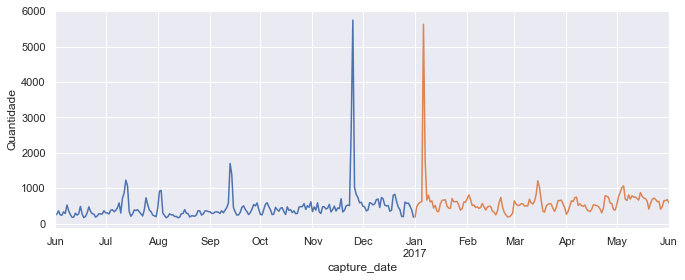

In [69]:
anos = ['2016', '2017']
for ano in anos:
    anual = time_series.loc[ano, 'quantity'].plot()
    anual.set_ylabel('Quantidade');

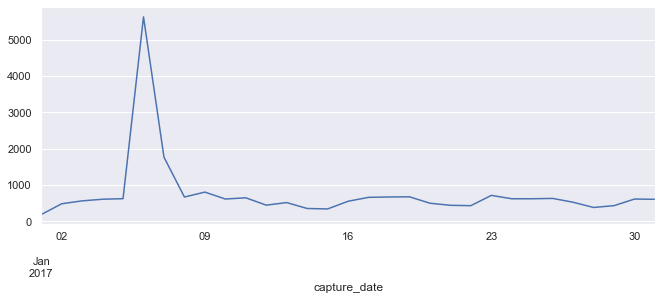

In [18]:
anual = time_series.loc['2017-01', 'quantity'].plot()

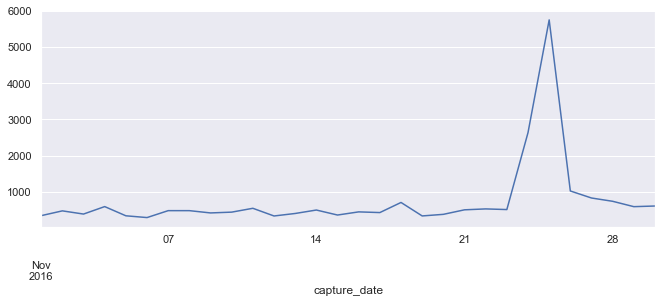

In [20]:
anual = time_series.loc['2016-11', 'quantity'].plot()

In [ ]:
# picos de vendas: black friday e início de janeiro

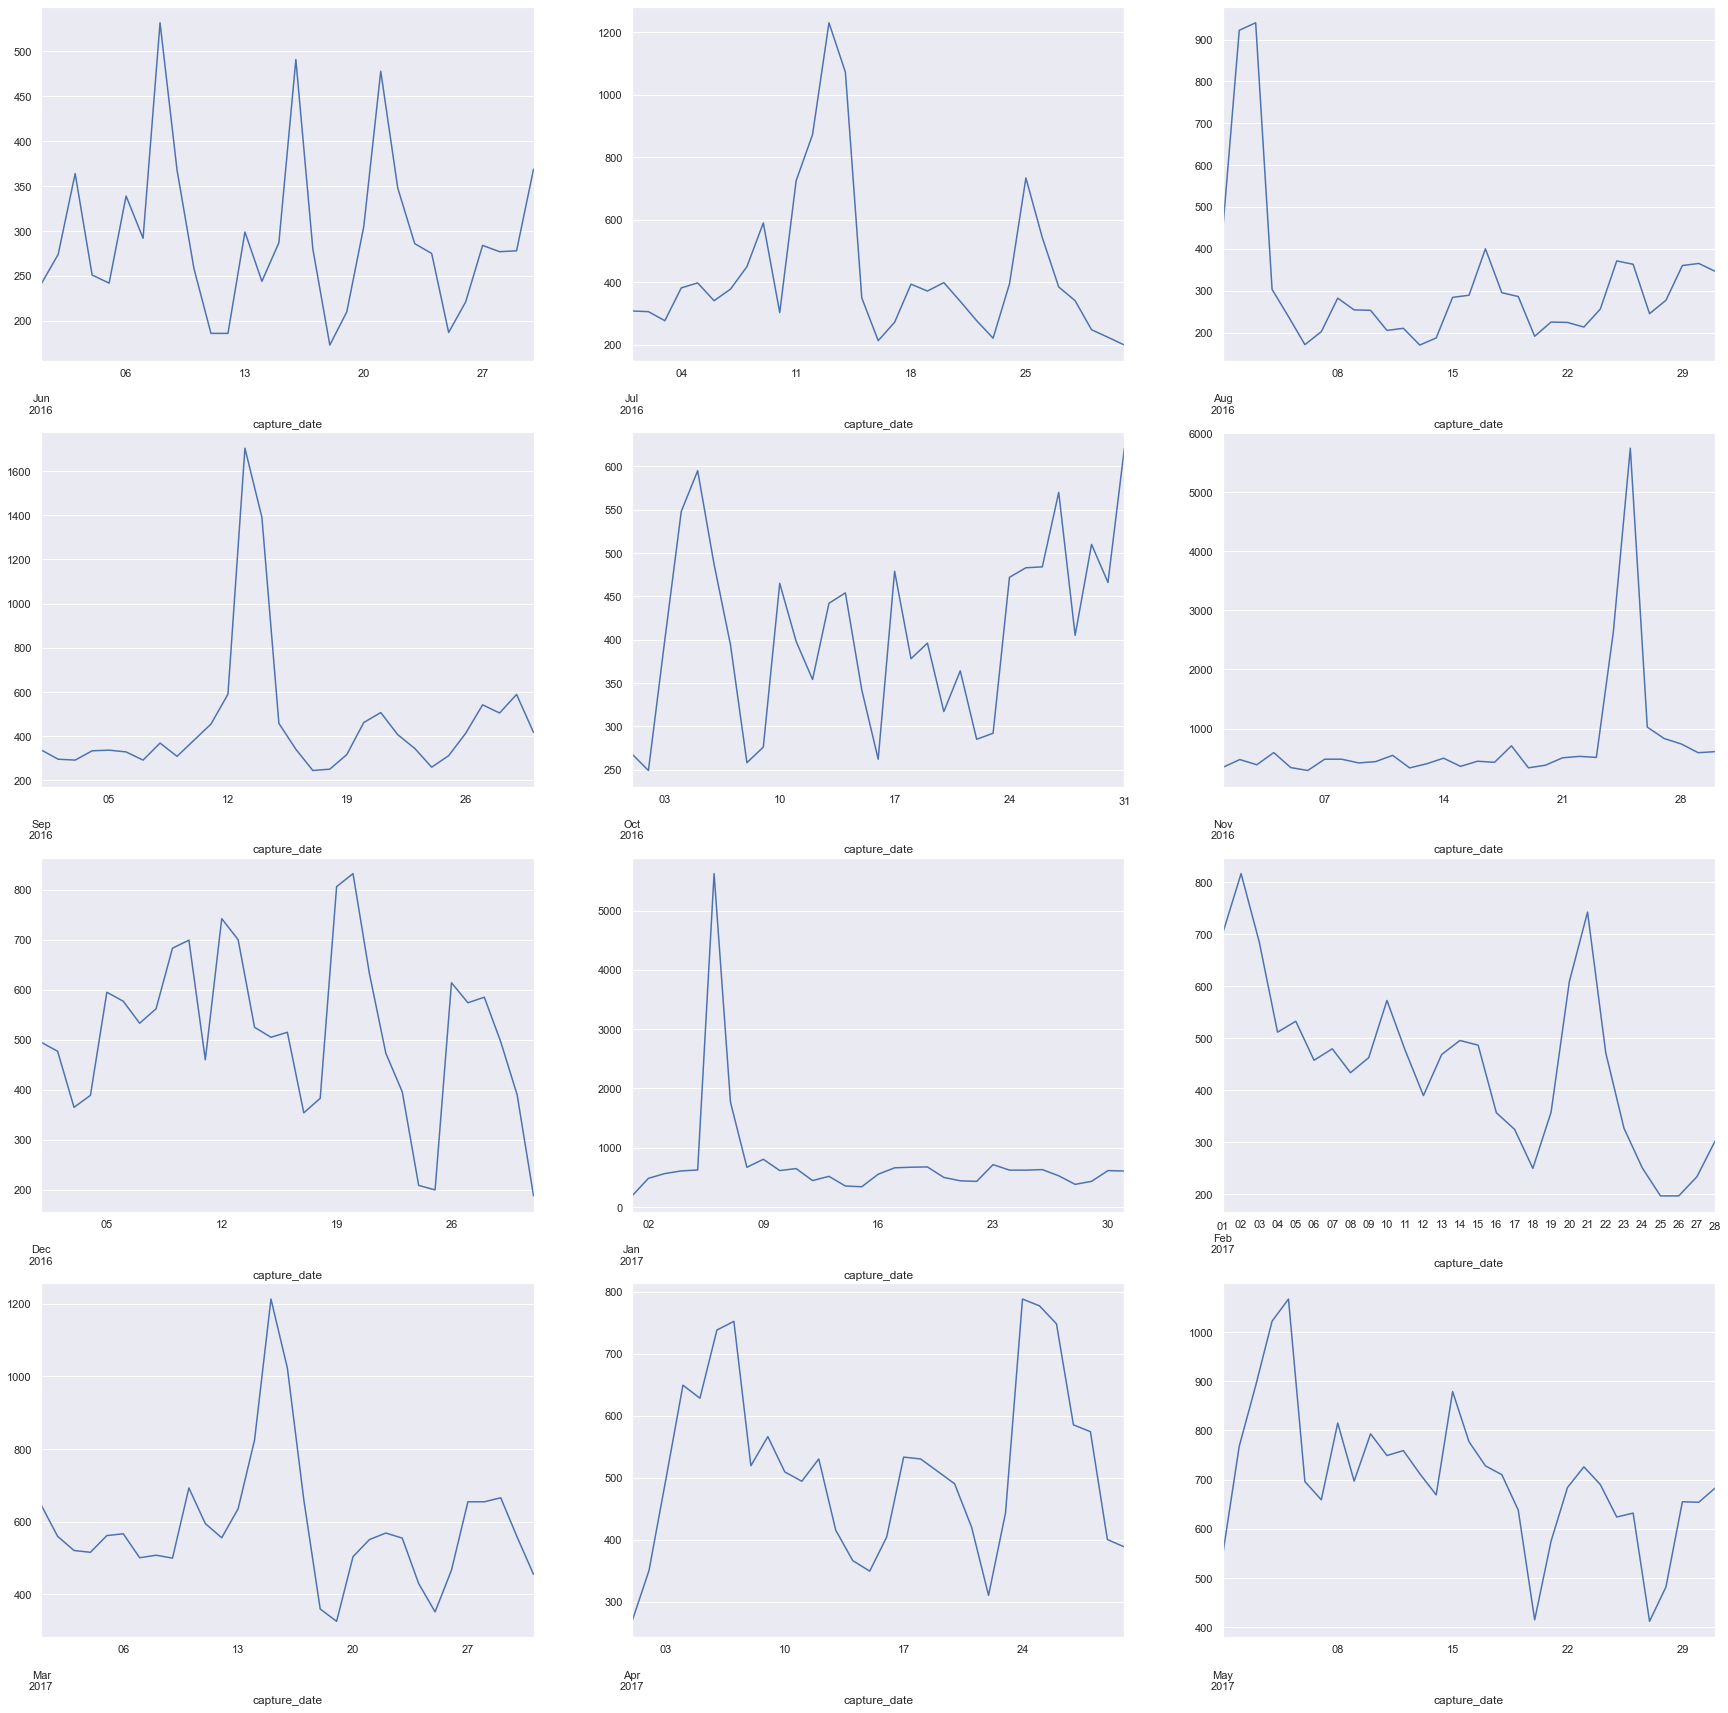

In [65]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
years = ['2016', '2017']
y = [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]
x = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]
contador = 0

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(30,30))
for year in years:
    for month in months:
        try:
            mes = time_series.loc['{}-{}'.format(year, month), 'quantity'].plot(ax=axes[x[contador], y[contador]])
            contador += 1
        except:
            pass

In [ ]:
# alguns meses tem dias em que vendeu muito mais; tentar conciliar com feriados e com promoções

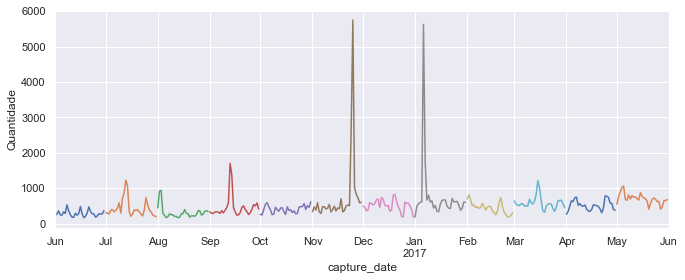

In [60]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
years = ['2016', '2017']

for year in years:
    for month in months:
        try:
            mes = time_series.loc['{}-{}'.format(year, month), 'quantity'].plot()
            mes.set_ylabel('Quantidade')
        except:
            pass

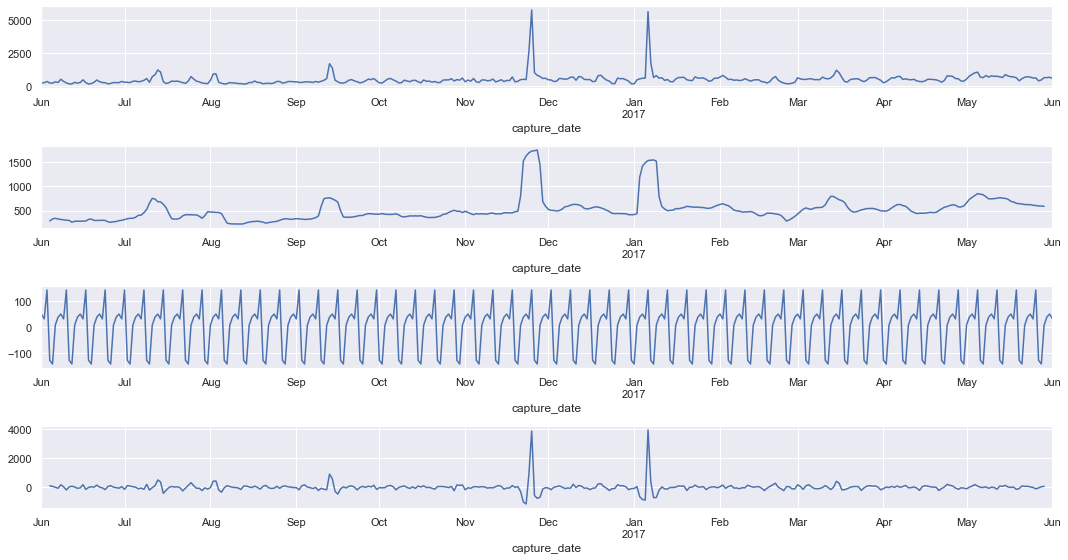

In [88]:
# Dessazonalizando
from statsmodels.tsa.seasonal import seasonal_decompose
time_series_season = time_series.loc[:, ['quantity']]
seasonplot = seasonal_decompose(time_series_season)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1)
seasonplot.trend.plot(ax=ax2)
seasonplot.seasonal.plot(ax=ax3)
seasonplot.resid.plot(ax=ax4)
plt.tight_layout()

In [89]:
product_categories = inventory.groupby('category')

In [92]:
categories_sum = inventory.groupby('category').sum()
categories_sum.head()

,quantity,price,pis_cofins,icms,tax_substitution,liquid_cost
category,,,,,,
388128822cef4b4f102ae881e040a64b,161141,3.452563e+07,3.185098e+06,3.632682e+06,2.647979e+06,1.996506e+07
4ece547755cba9e7fc14125bc895f31b,64,5.423365e+04,5.016614e+03,5.695878e+03,4.733052e+03,3.098149e+04
568696c0b6828f77884ea8628fcc6200,71,5.998456e+04,5.548572e+03,1.037559e+04,0.000000e+00,3.401698e+04
61ad270def6d4b2403f4536f39cff29a,203,5.278710e+03,4.832442e+02,9.511344e+02,0.000000e+00,2.572440e+03
90cc5bdd050bcd7cf0d50d079d0fda66,5791,2.880970e+06,2.656962e+05,2.868938e+05,2.310577e+05,1.712917e+06


<AxesSubplot:xlabel='capture_date'>

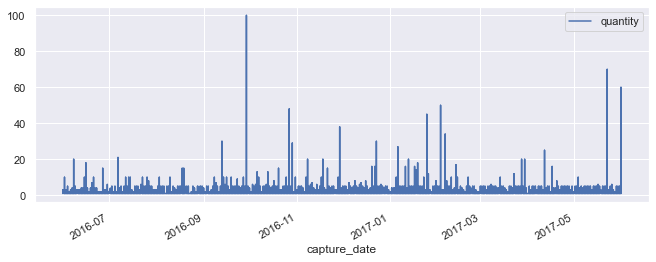

In [111]:
categories_over_time = inventory.loc[:, ('capture_date', 'quantity', 'category')]
#categories_over_time.sum()
#ax = plt.gca()
categories_over_time.plot(x='capture_date', y="quantity", ax=ax)
plt.xlabel("Date",size=16)
plt.ylabel("Temp",size=16)
plt.title("San Francisco Weather", size=24)

category
388128822cef4b4f102ae881e040a64b    AxesSubplot(0.125,0.2;0.775x0.68)
4ece547755cba9e7fc14125bc895f31b    AxesSubplot(0.125,0.2;0.775x0.68)
568696c0b6828f77884ea8628fcc6200    AxesSubplot(0.125,0.2;0.775x0.68)
61ad270def6d4b2403f4536f39cff29a    AxesSubplot(0.125,0.2;0.775x0.68)
90cc5bdd050bcd7cf0d50d079d0fda66    AxesSubplot(0.125,0.2;0.775x0.68)
98f679396a60f117b171ddedfcc3e5ed    AxesSubplot(0.125,0.2;0.775x0.68)
9a97178a18aa6333aabdfb21de182b99    AxesSubplot(0.125,0.2;0.775x0.68)
9cfa7aefcc61936b70aaec6729329eda    AxesSubplot(0.125,0.2;0.775x0.68)
d7ecf0071e88c21e993da125d2229a51    AxesSubplot(0.125,0.2;0.775x0.68)
dda10a917a9ea3120e5d299af5105290    AxesSubplot(0.125,0.2;0.775x0.68)
f79dccaf0b890eced0724d8563948c4f    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

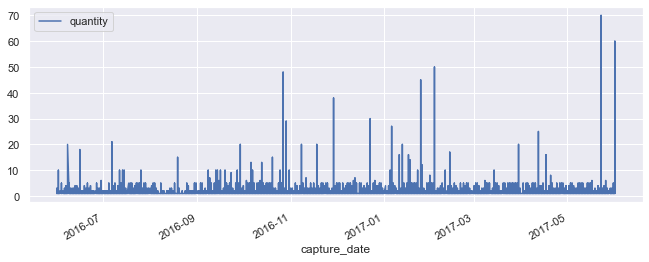

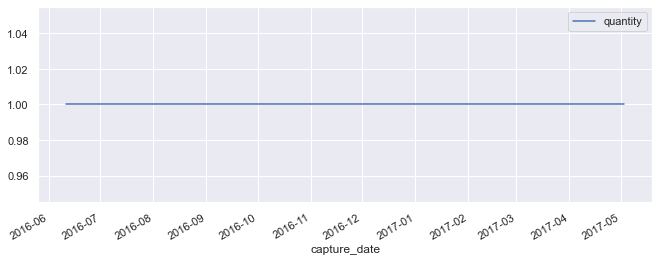

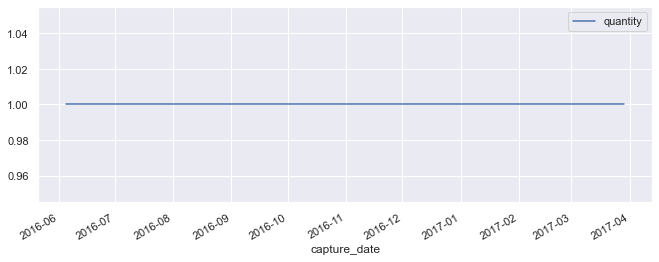

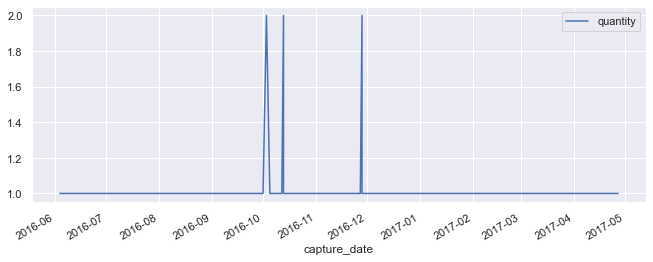

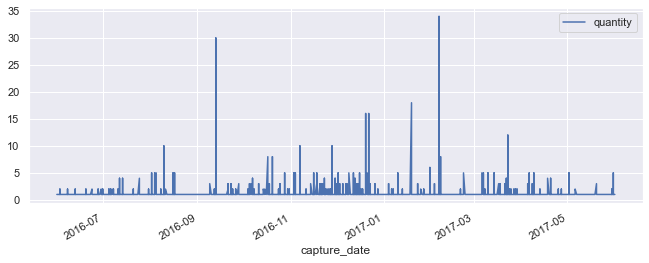

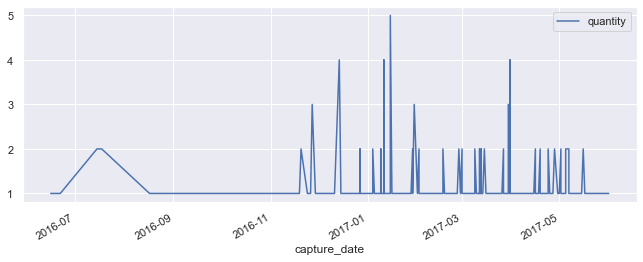

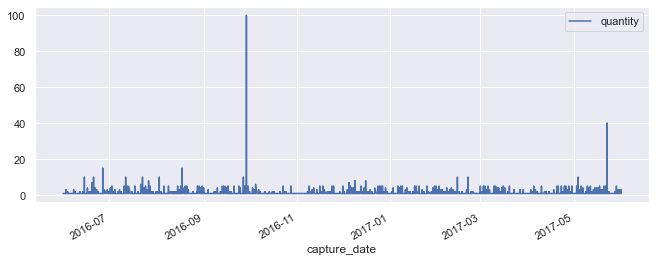

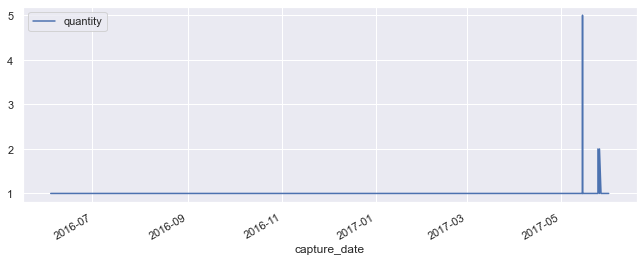

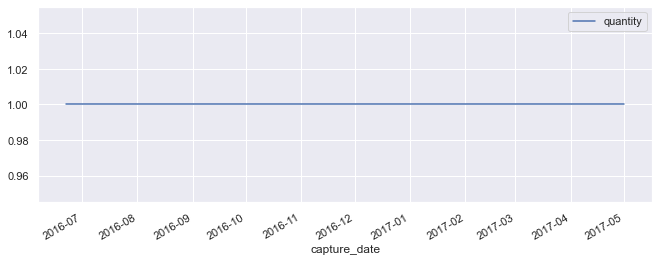

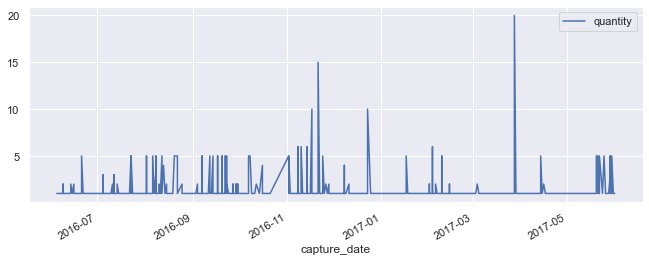

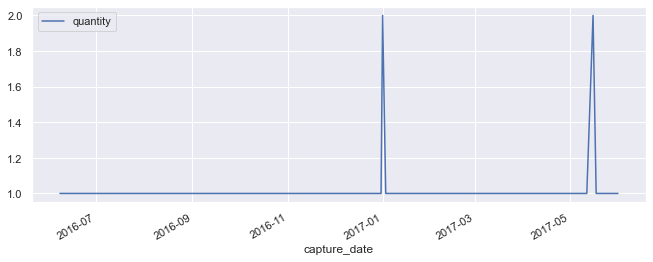

In [135]:
categories_over_time = inventory.loc[:, ('capture_date', 'quantity', 'category')]
categories_over_time = categories_over_time.groupby(['category'])
categories_over_time.head()
#categories_over_time.plot()
categories_over_time.plot(x='capture_date', y="quantity")

In [141]:
# Curva ABC
vendas_produtos = inventory.groupby('code').sum().sort_values("price", ascending=False)

In [153]:
#vendas_produtos_acumulada = vendas_produtos.cumsum(axis = 1, skipna = True)
total_vendas_produtos = vendas_produtos['price'].sum()
total_vendas_produtos

numpy.float64

In [146]:
vendas_produtos['cumulative'] = vendas_produtos['price'].cumsum(skipna = True)

In [166]:
vendas_produtos.shape

(131, 7)

In [162]:
# A:
percent = total_vendas_produtos * 0.8
group_a = vendas_produtos[(vendas_produtos.cumulative <= percent)]
group_a

,quantity,price,pis_cofins,icms,tax_substitution,liquid_cost,cumulative
code,,,,,,,
2e35421c34fb588ba40a0c57b3971d24,21723,7.196087e+06,663287.0113,697317.6400,681652.9478,4.470250e+06,7.196087e+06
4534ea61b50410b3b6243e02b40c8cd1,18896,3.436322e+06,0.0000,420605.9879,253111.5242,2.058499e+06,1.063241e+07
32ceebf3efea1d04ace4183d20d4da5b,9085,3.083203e+06,284877.8304,316116.0654,274467.0116,1.830242e+06,1.371561e+07
3454ea52396a4cfd3fc37414d30c7b9c,11211,2.136580e+06,196157.8676,212288.5795,148951.4297,1.124567e+06,1.585219e+07
760693745e10b0c5e68c42214c729b0d,5034,1.683410e+06,155453.4016,230550.4004,77173.2914,1.001702e+06,1.753560e+07
0671c2b9132a3f5215a4212ce0691694,6627,1.385037e+06,127799.4993,163566.7301,88030.7599,7.605647e+05,1.892064e+07
d5bc9e14d090330cd07e6ccbcb3c3e4e,4253,1.271070e+06,117466.1789,191103.1468,45401.7916,9.214343e+05,2.019171e+07
727673fa3e457bc596532b3eb26b23a0,4128,1.235791e+06,114054.0949,174352.0623,50921.2235,8.577346e+05,2.142750e+07
5b7a30a9e6a43b170ad4d9e00d8d9359,6495,1.207587e+06,111584.6191,112029.9534,115025.3348,7.386007e+05,2.263509e+07


In [165]:
group_a.shape

(30, 7)